In [18]:
#importing Required Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [19]:
#opening csv files
data = pd.read_csv("titanic.csv")

In [20]:
#many fields are blank in "Cabin","Age"
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


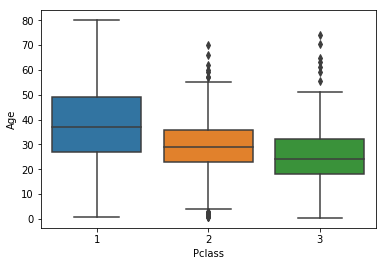

In [21]:
#plotting boxplot to find relationship btwn age and pclass
sns.boxplot(x="Pclass",y = "Age",data = data)

In [25]:
#function to fill age column
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37              #average values when pclass is 1 observed from boxplot
        elif Pclass == 2:
            return 29              #average values when pclass is 2 observed from boxplot
        else:
            return 24              #average values when pclass is 3 observed from boxplot
    else:
        return Age                 #if already age column is filled then leave it as it is  

In [27]:
#applying our function to Age column
data["Age"]= data[["Age","Pclass"]].apply(impute_age,axis=1)

In [11]:
data.columns

Index(['male', 'Q', 'S', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [12]:
#assinging labels
x = data[['male', 'Q', 'S', 'Pclass', 'Age', 'SibSp', 'Parch','Fare']]
y = data["Survived"]


In [13]:
#spliiting the data(70-30)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 0)

In [14]:
#creating a instance
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)


C:\Users\SATHISH\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
#predicting y_test
predictions = logmodel.predict(x_test)

In [16]:
print(classification_report(y_test,predictions))
#report to see the errors/effeciency

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       168
           1       0.75      0.69      0.72       100

   micro avg       0.80      0.80      0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [17]:
confusion_matrix(y_test,predictions)
#to see the effeciency of model

array([[145,  23],
       [ 31,  69]], dtype=int64)